In [3]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

## 1 Load dataset


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalize data 
x_train, x_test = x_train / 255., x_test / 255.
print(f"x_train.shape: {x_train.shape}")

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


### Prep data to format suitable for CNN

- H x W x C


In [6]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# num classes for labels
K = len(set(y_train))
print(f"Number of classes: {K}")

Number of classes: 10


## 2 Build Model


In [8]:
kernel_size = (3, 3)
kernel_strides = 2 # img dimension halved after every convolution

i = Input(shape=x_train[0].shape)
x = Conv2D(32, kernel_size, kernel_strides, activation = 'relu')(i)
x = Conv2D(64, kernel_size, kernel_strides, activation='relu')(x)
x = Conv2D(128, kernel_size, kernel_strides, activation='relu')(x)

x = Flatten()(x) # convert image into single dimension feature vector for ANN
x = Dropout(0.2)(x) # for regularization
x = Dense(512, activation='relu')(x)
x - Dropout(0.2)(x) # for regularization
x = Dense(K, activation='softmax')(x) # output layer

model = Model(i, x) # list / single input | list / single output

## 3 Compile & fit model


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5168 - accuracy: 0.8098 - val_loss: 0.4157 - val_accuracy: 0.8499
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3624 - accuracy: 0.8627 - val_loss: 0.3553 - val_accuracy: 0.8675
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3097 - accuracy: 0.8824 - val_loss: 0.3108 - val_accuracy: 0.8867
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2729 - accuracy: 0.8978 - val_loss: 0.3218 - val_accuracy: 0.8857
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2472 - accuracy: 0.9064 - val_loss: 0.3011 - val_accuracy: 0.8855
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2214 - accuracy: 0.9166 - val_loss: 0.3086 - val_accuracy: 0.8857
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2026 - accuracy: 0.9230 - val_loss: 0.2996 - val_accuracy:

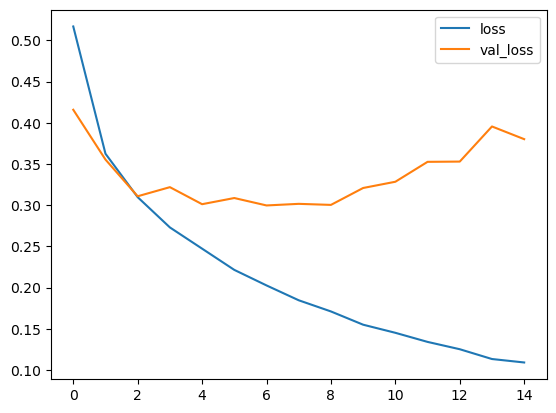

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

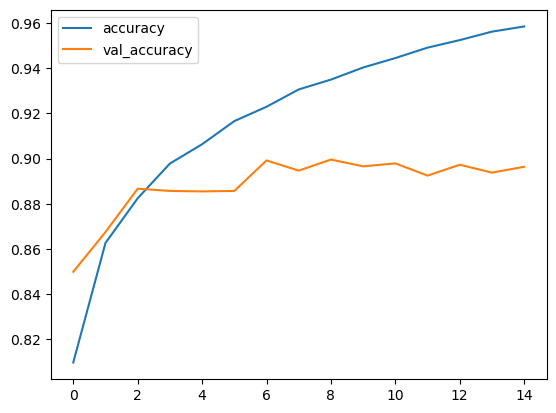

In [11]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## 4 Perform prediction & evalute model


In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

313/313 [==============================] - 1s 2ms/step


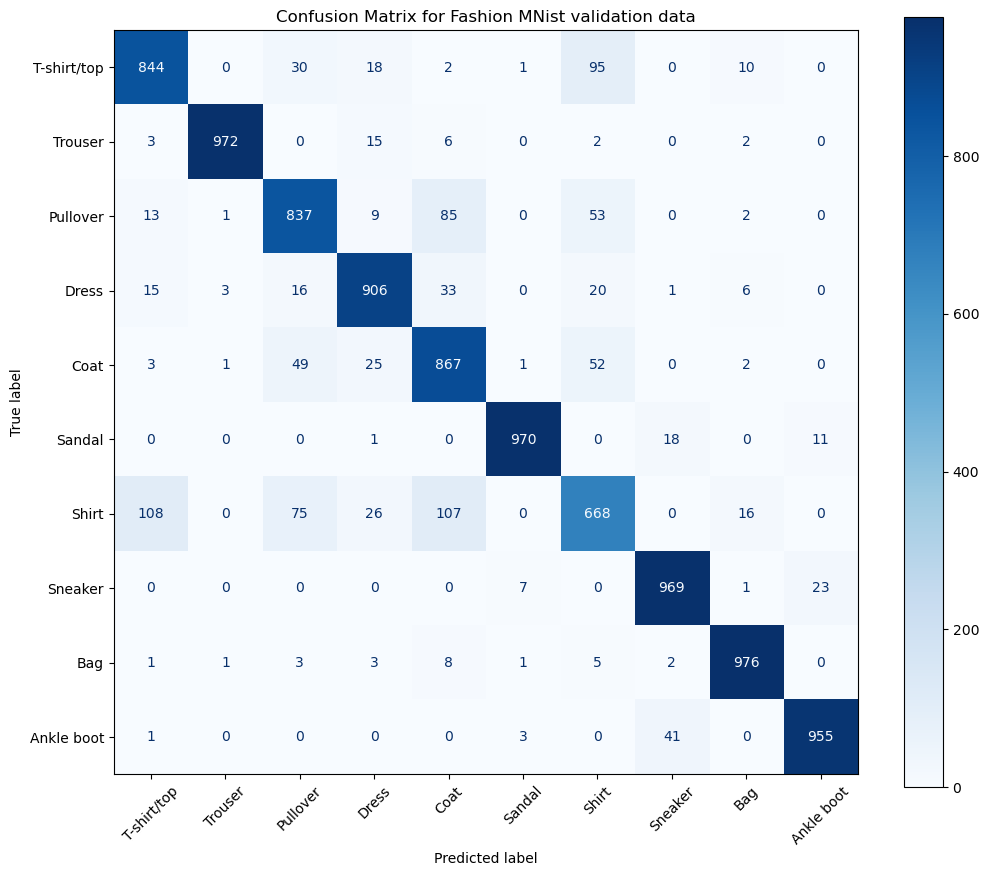

In [22]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) # convert probabilities to classes

conf_matrix = confusion_matrix(y_test, y_pred_classes, labels=range(K))
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Fashion MNist validation data")
plt.xticks(rotation=45)
plt.show()

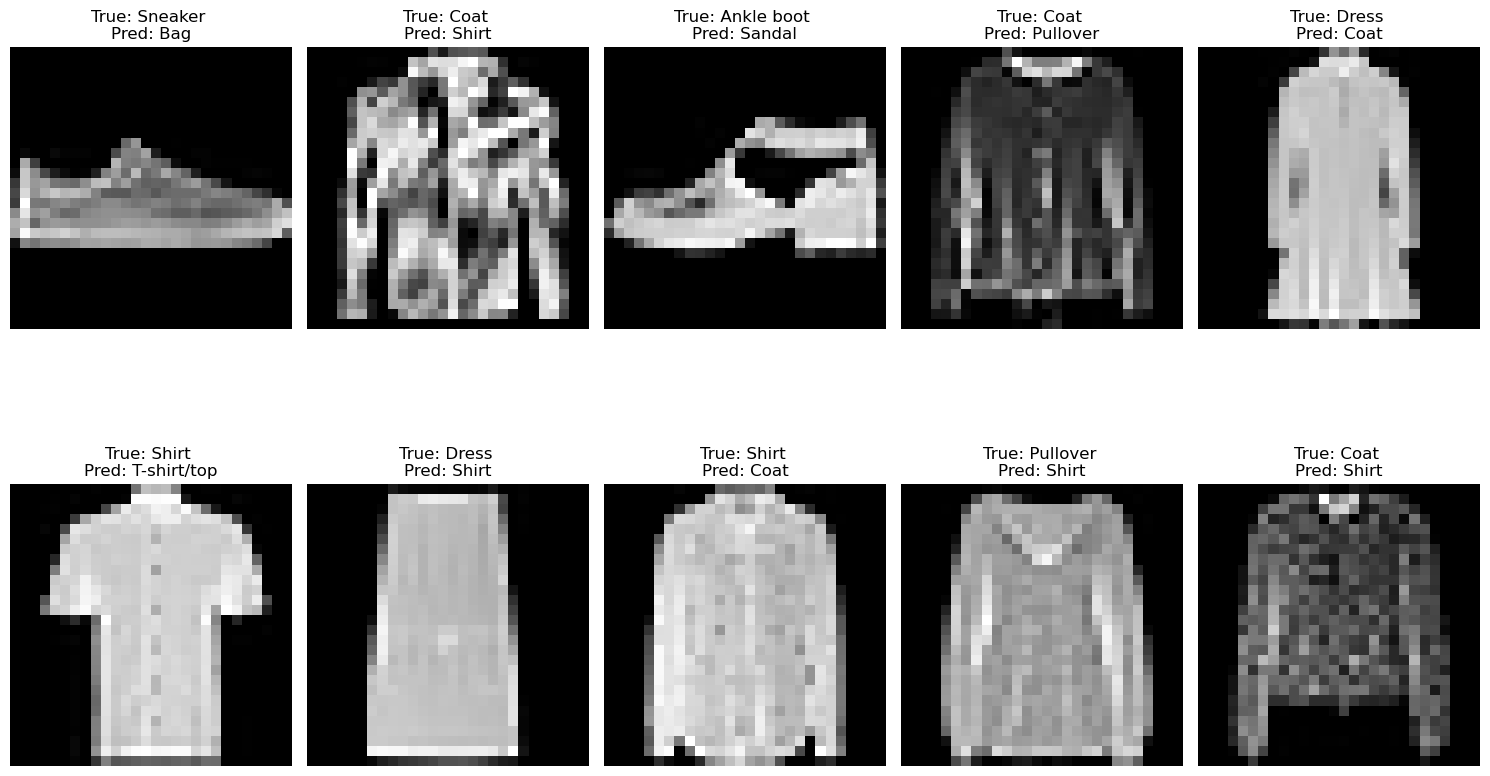

In [23]:
misclassified_idx = np.where(y_pred_classes != y_test)[0]

num_samples = 10
plt.figure(figsize=(15, 10))

for i, idx in enumerate(misclassified_idx[:num_samples]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {class_labels[y_test[idx]]} \nPred: {class_labels[y_pred_classes[idx]]}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()